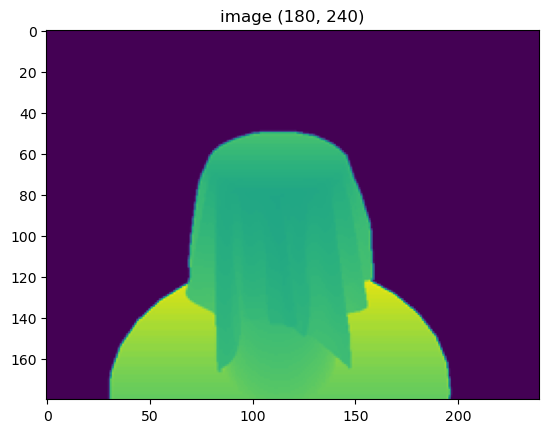

In [ ]:
import matplotlib.pyplot as plt
import cv2

example_png = "/home/yons/Projects/SimpleClothSimulator/data/export_data/uniform_3c_sample25_noised16_xgpu_initrot1_cam1.middle/depth/mesh0/init_rot0_cam0/0.png"

raw = cv2.imread(example_png, cv2.IMREAD_GRAYSCALE)
plt.title(f"image {raw.shape}")
plt.imshow(raw)
plt.show()

(180, 240)
(180, 240)


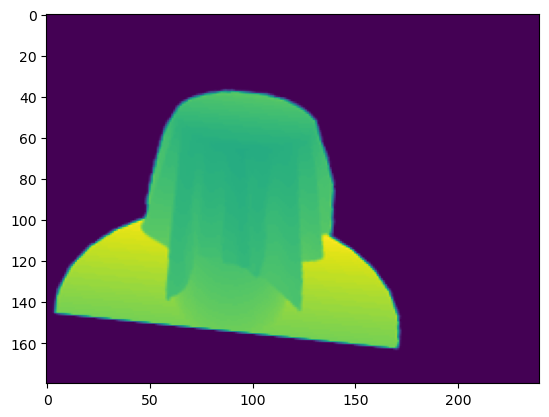

In [ ]:
import albumentations as A
aug = A.augmentations.geometric.transforms.Affine(scale = (0.8, 1.2), translate_percent = (-0.2, 0.2), rotate = (-10, 10))

print(raw.shape)
new_img = aug(image = raw)['image']
print(new_img.shape)
plt.imshow(new_img)
plt.show()

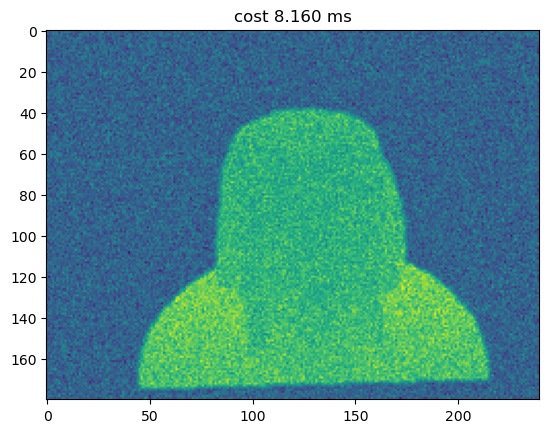

In [ ]:

from torchvision.transforms import RandomAffine, GaussianBlur
from torchvision import transforms
import torch
import numpy as np
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(
            self.mean, self.std)

class ChangeChannel(object):
    def __init__(self):
        pass

    def __call__(self, tensor):
        assert len(tensor.shape) == 3
        num_of_views = tensor.shape[0]
        shift = np.random.randint(0, num_of_views)
        assert type(shift) == int
        
        tensor = torch.roll(tensor, shift, dims=0)
        return tensor
    def __repr(self):
        return "depth view roll"

affine = RandomAffine(degrees=(-5, 5),
                      translate=(0.07, 0.07),
                      scale=(0.9, 1.1))
blur = GaussianBlur(kernel_size=3)
gaussian_noise = AddGaussianNoise(mean=0, std=0.1)
roll = ChangeChannel()
trans_aug = transforms.Compose([transforms.ToTensor(), affine, blur, gaussian_noise, roll])

import time
st = time.time()
new_res = trans_aug(raw)
ed = time.time()
import matplotlib.pyplot as plt
plt.imshow(new_res[0])
plt.title(f"cost {1000 * (ed - st):.3f} ms")
plt.show()


In [1]:
import albumentations as A
from albumentations.core.transforms_interface import BasicTransform
class AlbuAxisRoll(BasicTransform):
    def __init__(self):
        super(BasicTransform).__init__()
        
    def __call__(self, image, force_apply = False):
        cur_img = image[0]
        num_of_views = cur_img.shape[0]
        shift = np.random.randint(0, num_of_views)
        if shift !=0:
            cur_img = np.roll(cur_img, shift, axis=0)
        image[0] = cur_img
        return image

aug = A.Compose([
    A.augmentations.geometric.transforms.ShiftScaleRotate(shift_limit=0.07, scale_limit=0.1, rotate_limit=10),
    A.augmentations.transforms.Blur(blur_limit = 3),
    A.augmentations.transforms.GaussNoise(var_limit=(100, 200), always_apply=True),
    AlbuAxisRoll(),
])

st = time.time()


# new_data = aug(image = raw)['image']
new_data = aug(image = raw)

ed = time.time()
print(f"new data dtype {new_data.dtype}")
plt.imshow(new_data)
plt.title(f"cost {(ed - st) * 1000 : .3f} ms")
plt.show()

NameError: name 'time' is not defined

(4, 180, 240)


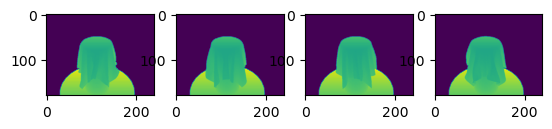

In [2]:
import numpy as np
import glob
import os
target_dir = "../data/export_data/uniform_3c_sample25_noised16_xgpu_initrot1_cam1.small/depth/mesh0/init_rot0_cam0"
assert os.path.exists(target_dir)
pngs = glob.glob(f"{target_dir}/*png")
# 1. load the png
import cv2
raw_img = np.array([cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in pngs])
print(raw_img.shape)

import matplotlib.pyplot as plt
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(raw_img[i])
plt.show()

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'